# CS106AP Winter 2019 Section 8 SOLUTION

Alice, Bob, Charlie, and Diana all ate too much for dinner one night and agreed to go home and run for a bit to work off the excess calories. They all wear smartwatches that record their heart rates every second and used them while they exercised. Finally, they uploaded their heart rate data to the cloud to show each other that they in fact did work out. 

Unfortunately, two of the friends did not actually go running like they were supposed to, and to make matters worse, the cloud database experienced an error and mixed up all their data! We need your help to organize and clean up the data and ultimately find out who didn't do their exercise. 

#### To run the code in a block, press shift->enter. 
#### REMEMBER: This notebook is hosted on the cloud, not your computer, so any changes you make will not be saved! If you wish to save a copy of your work as a PDF, right click on the screen, press "print", then choose "save as PDF". 

## Problem 1

The first step is to parse through the file `mixed_heart_rates.csv` and store the data. 
The format of the data file is `name,time,heart_rate`, where `time` is the elapsed time in seconds from the beginning of their workout. 
Create a dictionary that maps names to a list of tuples, with the first element of the tuple being the time and the second element being the heart rate at that time. Don't worry about ordering yet!

In [42]:
# Parse through this file
filename = "jumbled_heart_rates.csv"
# Create a dictionary mapping names to tuples of (time,heart_rate)
name_to_heart_rates = {}
# YOUR CODE HERE
with open(filename) as f:
    lines = f.readlines()
for line in lines:
    split_line = line.split(",")
    name = split_line[0]
    time = int(split_line[1])
    heart_rate = float(split_line[2])
    if not name in name_to_heart_rates:
        name_to_heart_rates[name] = []
    name_to_heart_rates[name].append((time, heart_rate))


## Problem 2

Now that we have a dictionary containing the relevant data, it's time to organize it! Sort each list of tuples by the time elapsed. Don't create a new dictionary - just update the current dictionary keys with the new sorted lists, so `Alice` in `name_to_heart_rates` should now map to a list of tuples sorted by the time elapsed. Remember that it always helps to print out your result at the end of each step to make sure everything is running smoothly.

Do you need to use a custom lambda sort to sort the tuples by time? Why or why not?

**Answer: No, because sorted() automatically sorts tuples by the first index, then the second index if the first index is tied, and so on.**

After sorting, find the maximum heart rate for each person using a call to max with a lambda function. This should already give us a hint as to who did their exercise!

In [43]:
# Sort each list of tuples by time elapsed
# YOUR CODE HERE
for name in name_to_heart_rates:
    name_to_heart_rates[name] = sorted(name_to_heart_rates[name])

# Find and print out the maximum heart rate for each person using a call to max() with a provided lambda
# YOUR CODE HERE
for name in name_to_heart_rates:
    print(name + " max heart rate:")
    max_heart_rate = max(name_to_heart_rates[name], key = lambda x: x[1])[1]
    print(max_heart_rate)



diana max heart rate:
104.895
charlie max heart rate:
77.4244
bob max heart rate:
104.368
alice max heart rate:
75.4733


## Problem 3

Great! Everything's looking in order. Now, use a list comprehension to create a new list for each of the four friends that consists of just the heart rates in sorted order. Modify the provided `alice_heart_rates`, `bob_heart_rates`, etc., to be your final lists. 

In [44]:
# Generate a list of heart rates only for each person using a list comprehension
# YOUR CODE HERE
alice_heart_rates = [tup[1] for tup in name_to_heart_rates["alice"]]
bob_heart_rates = [tup[1] for tup in name_to_heart_rates["bob"]]
charlie_heart_rates = [tup[1] for tup in name_to_heart_rates["charlie"]]
diana_heart_rates = [tup[1] for tup in name_to_heart_rates["diana"]]

# Bonus: Create a list of lists of final heart rates using a nested list comprehension!
final_heart_rates = [[tup[1] for tup in name_to_heart_rates[name]] for name in name_to_heart_rates]
# What information do we lose with this method?
# Answer: We no longer know the name associated with each list, 
# since the dictionary keys are given to us in a random order.




## Problem 4

Finally, we can graph our resulting lists to expose the culprits once and for all! We'll be using a submodule called pyplot, located inside the matplotlib module. 

Some helpful functions include the following: 
 * **pyplot.figure(figsize=(width,height))**
     * This function lets you specify the width and height of the graph. You should specify your desired width and height inside with a tuple passed in to the figsize argument, as shown above. A good width and height to start out with would be 10 and 8!
 * **pyplot.plot(values, label=name, color=desired_color)**
     * This function actually places `values` in a list on the plot. You can specify a label for each line (should be the name of the person) as well as a desired color ("red", "green", "blue", etc).
 * **pyplot.xlabel(xlabel) and pyplot.ylabel(ylabel)**
     * Sets the x and y labels of the graph to the desired parameter.
 * **pyplot.title(title)**
     * Titles the graph with a title of your choosing.
 * **pyplot.legend()**
     * Shows the legend based on the labels specified in plot().
 * **pyplot.show()**
     * Actually displays the graph. Won't show up otherwise - everything else is just setting things, and this is the command that shows it!
  
Play around with different parameters and make a great looking graph! If you'd like to see a list of *all* functions in the module, you can find them [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html).

### Note: You may need to run this twice if you don't see anything the first time!
### To make the graph fit the page and not scroll, click "cell->current outputs->toggle scrolling"

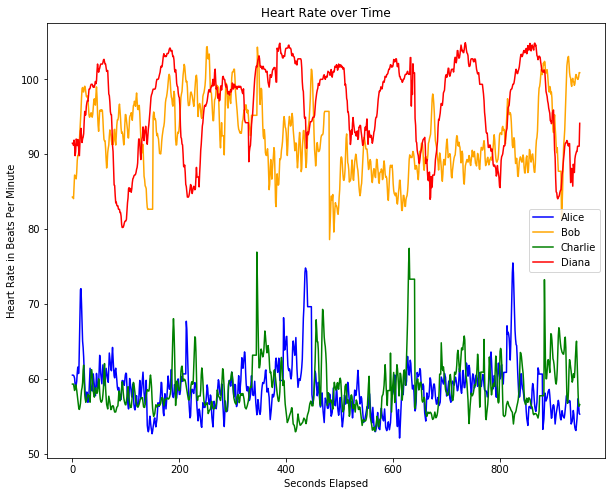

In [45]:
from matplotlib import pyplot

# Plot the graphs using the given functions above! If the graph is too big and you 
# need to scroll, to make the graph fit the page and not scroll, click 
# "cell->current outputs->toggle scrolling" at the menu above.
# YOUR CODE HERE
pyplot.figure(figsize=(10,8))
pyplot.plot(alice_heart_rates, label='Alice', color='blue')
pyplot.plot(bob_heart_rates, label='Bob', color='orange')
pyplot.plot(charlie_heart_rates, label='Charlie', color='green')
pyplot.plot(diana_heart_rates, label='Diana', color='red')
pyplot.title("Heart Rate over Time")
pyplot.xlabel("Seconds Elapsed")
pyplot.ylabel("Heart Rate in Beats Per Minute")

pyplot.legend()
pyplot.show()

Who were the two friends who didn't exercise? 

**Answer: Alice and Charlie**

Who did exercise? 

**Answer: Bob and Diana**